<a href="https://colab.research.google.com/github/AmiraOsamaMohamed/Selected2/blob/main/Copy_of_Selected2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from os import listdir
from matplotlib.image import *
from sklearn.model_selection import train_test_split
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.normalization import batch_normalization
from matplotlib.image import imread
import tensorflow as tf
# from tensorflow.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras.preprocessing import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


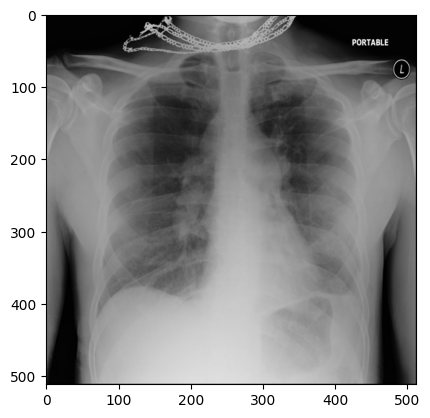

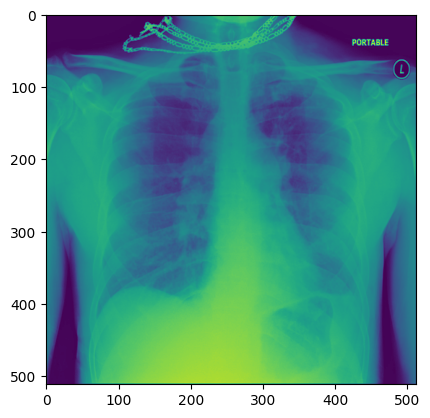

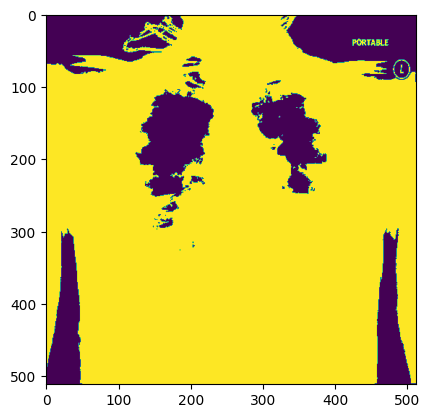

(512, 512)


In [ ]:
####data(images) preprocessing########
import matplotlib.pylab as plt
Train_DIR=r'/content/drive/MyDrive/'
Categories=['Normal','Tuberculosis']
for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img))
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret,binary_image = cv2.threshold(gray_image,70,255,0)
        plt.imshow(image)
        plt.show()
        plt.imshow(gray_image)
        plt.show()
        plt.imshow(binary_image)
        plt.show()
        print(gray_image.shape)
        break
    break

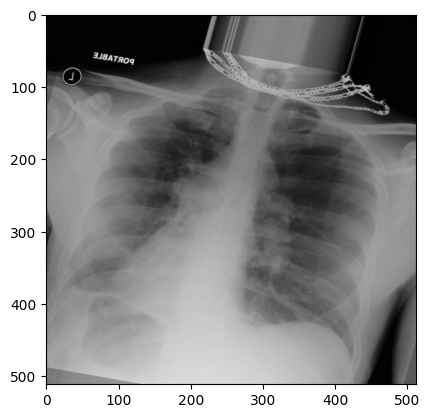

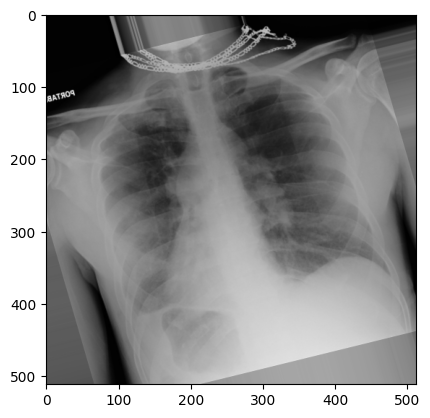

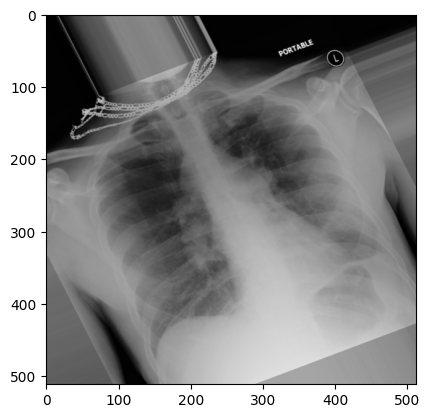

In [ ]:
train_datagen = ImageDataGenerator(
           rescale=1./255,
           zoom_range=0.2,
           rotation_range = 30,
           width_shift_range = 0.1,
           horizontal_flip=True)
newImage = image.reshape((1,) + image.shape)
i=0
for batch in train_datagen.flow(newImage, batch_size=1):
        img = np.reshape(batch,(512,512,3))
        plt.imshow(img)
        plt.show()
        i += 1
        if i == 3:
                 break 

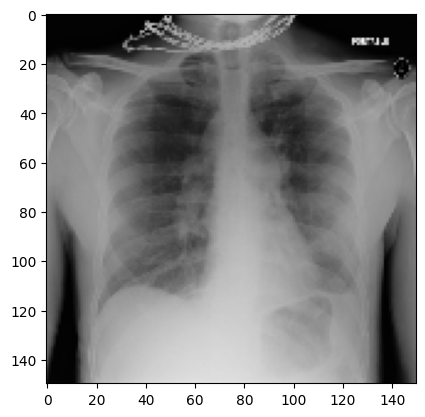

In [ ]:
IMG_SIZE=150
new_image=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [ ]:
def load_normal_images_and_labels():
    img_lst=[]
    labels=[]
    j=0
    for index in os.listdir('/content/drive/MyDrive/Normal'):  
        img=cv2.imread(os.path.join('/content/drive/MyDrive/Normal',index))
        #resize image to 150*150
        resized_img =cv2.resize(img,(150,150))
         # convert image to gray
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        # convert image to binary image
        ret,binary_img = cv2.threshold(gray_img,70,255,0)
        img_lst.append(binary_img)
        labels.append('Normal')
        j+=1
        
    return img_lst, labels
images1, labels1 = load_normal_images_and_labels()
print("No. of images loaded = ",len(images1),"\nNo. of labels loaded = ",len(labels1))
print(type(images1),type(labels1))

No. of images loaded =  3500 
No. of labels loaded =  3500
<class 'list'> <class 'list'>


In [ ]:
def load_tuberculosis_images_and_labels():
    img_lst=[]
    labels=[]
    newImages=[]
    j=0
    for index in os.listdir('/content/drive/MyDrive/Tuberculosis'):  
        img=cv2.imread(os.path.join('/content/drive/MyDrive/Tuberculosis',index))
        #resize image to 150*150
        resized_img = cv2.resize(img,(150,150))
        lab = resized_img.reshape((1,) + resized_img.shape)
        i=0
        for batch in train_datagen.flow(lab, batch_size=1):
                 reshapedImage = np.reshape(batch,(150,150,3))
                 gray_img = cv2.cvtColor(reshapedImage, cv2.COLOR_BGR2GRAY)
                 ret,binary_img = cv2.threshold(gray_img,70,255,0)
                 newImages.append(binary_img)
                 labels.append('Tuberculosis')
                 i += 1
                 if i == 3:
                           break 
        #######################
        #######################
        # convert image to gray
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        # convert image to binary image 
        ret,binary_img = cv2.threshold(gray_img,70,255,0)
        img_lst.append(binary_img)
        labels.append('Tuberculosis')
        j+=1
      
    return img_lst, labels,newImages
images2, labels2 ,newImages = load_tuberculosis_images_and_labels()
print("No. of images loaded = ",len(images2),"\nNo. of new images loaded = ",len(newImages),"\nNo. of labels loaded = ",len(labels2))
print(type(images2),type(labels2))

No. of images loaded =  709 
No. of new images loaded =  2127 
No. of labels loaded =  2836
<class 'list'> <class 'list'>


In [ ]:
images=images1+images2+newImages
labels=labels1+labels2
images =np.array(images)
labels =np.array(labels)
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (6336, 150, 150) 
Labels shape =  (6336,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from sklearn.utils import shuffle
def shuffle_in_unison(a,b):
    assert len(a)==len(b)
    shuffled_a=np.empty(a.shape,dtype=a.dtype)
    shuffled_b=np.empty(b.shape,dtype=b.dtype)
    permutation=np.random.permutation(len(a))
    for old_index,new_index in enumerate(permutation):
      shuffled_a[new_index]=a[old_index]
      shuffled_b[new_index]=b[old_index]
    return   shuffled_a,shuffled_b
shuffled_a,shuffled_b=shuffle_in_unison(images,labels)

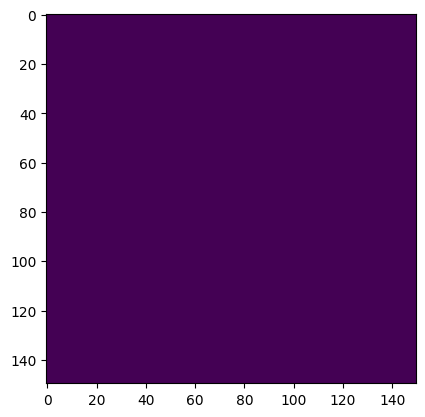

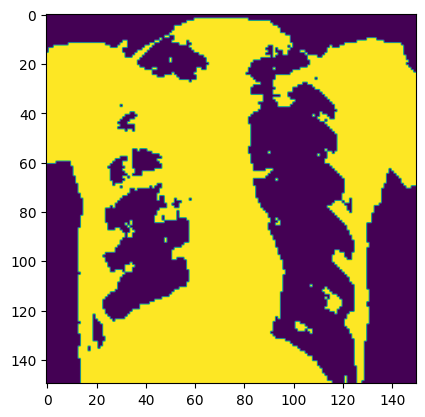

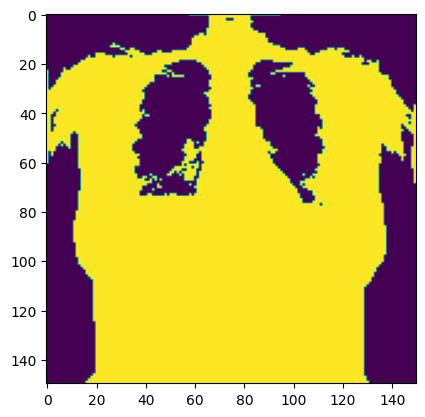

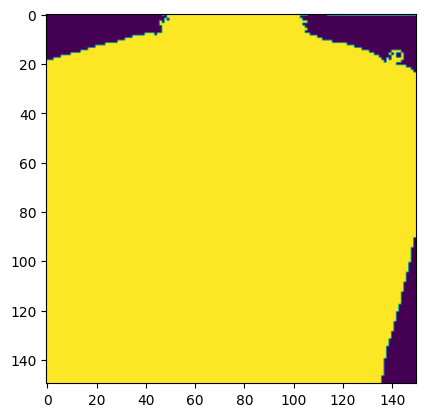

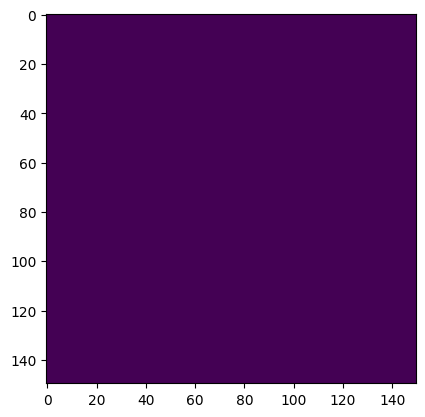

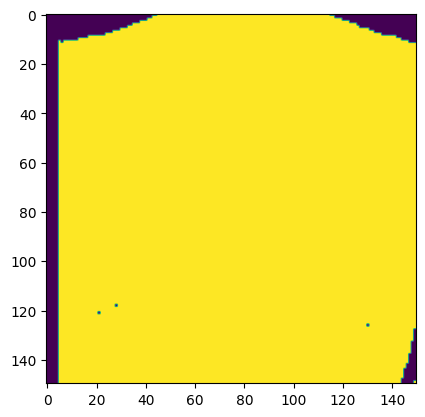

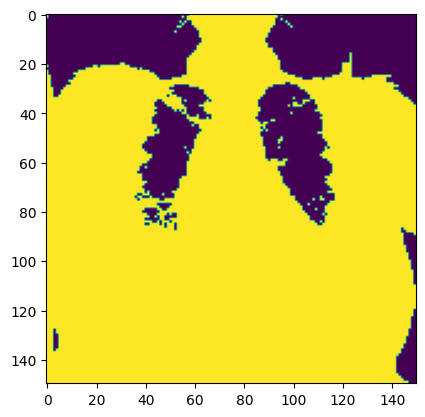

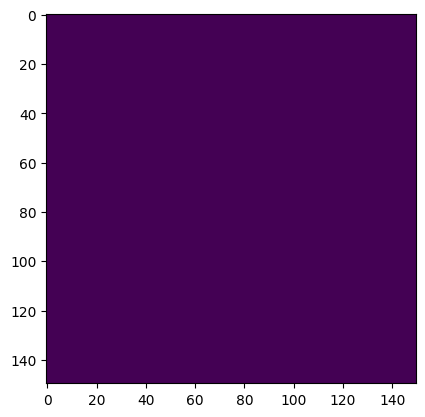

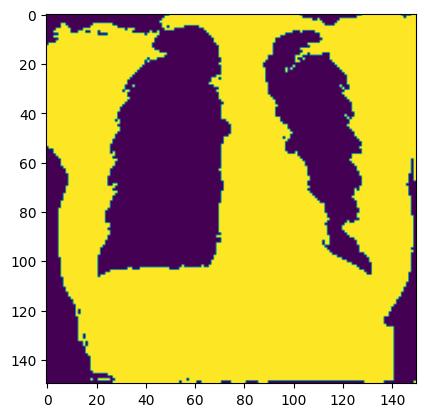

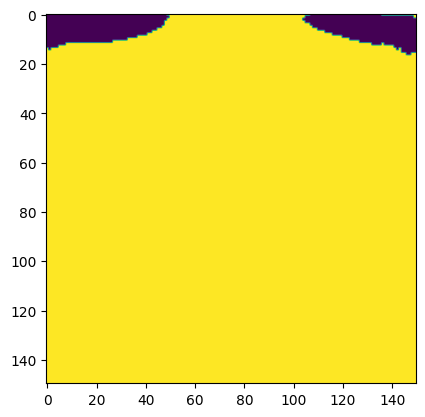

Tuberculosis
Tuberculosis
Normal
Normal
Tuberculosis
Normal
Normal
Tuberculosis
Tuberculosis
Normal
6336
6336
(6336, 150, 150)
(6336,)


In [ ]:
k=0
for i in shuffled_a:
   plt.imshow(i)
   plt.show()
   k+=1
   if k==10:
           break
k=0
for i in shuffled_b:
   print(i)
   k+=1
   if k==10:
           break  
print(len(shuffled_a))   
print(len(shuffled_b))    
print(shuffled_a.shape)   
print(shuffled_b.shape)            

In [ ]:
#convert catoregal data into numerical 
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
Y_train= lb.fit_transform(shuffled_b)
X_train= shuffled_a
print(Y_train)


[1 1 0 ... 1 0 1]


In [ ]:
# label 0==>normal     1==>Tuberculosis
#######spliting data########
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=42)
print(X_train.shape, x_train.shape, x_test.shape,x_val.shape)


(6336, 150, 150) (3547, 150, 150) (1268, 150, 150) (1521, 150, 150)


In [ ]:
####scale of each feature###
X_train_scaled = x_train/255
X_test_scaled = x_test/255
X_val_scaled=x_val/255
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_val_scaled.shape)
print(y_train.shape)

(3547, 150, 150)
(1268, 150, 150)
(1521, 150, 150)
(3547,)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import MaxPooling2D, Conv2D

In [ ]:
#building cnn model
cnn_model = Sequential()
cnn_model.add(Conv2D(16,1,padding="same", activation="relu", input_shape=(150,150,1)))
cnn_model.add(MaxPooling2D(padding="same"))

cnn_model.add(Conv2D(32, 1, padding="same", activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(MaxPooling2D(padding="same"))

cnn_model.add(Conv2D(64,1,padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(padding="same"))

cnn_model.add(Conv2D(128, 1, padding="same", activation="relu"))
cnn_model.add(Dropout(0.5))

cnn_model.add(MaxPooling2D(padding="same"))
cnn_model.add(Conv2D(256, 1, padding="same", activation="relu"))
cnn_model.add(Dropout(0.5))

cnn_model.add(MaxPooling2D(padding="same"))
cnn_model.add(Conv2D(512, 1, padding="same", activation="relu"))
cnn_model.add(Dropout(0.5))

cnn_model.add(MaxPooling2D(padding="same"))
cnn_model.add(Flatten())
#model.add(Dense(128,activation="relu"))
#model.add(Dense(2, activation="softmax"))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      32        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        544       
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [36]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.000001,  # minimium amount of change to count as an improvement
    patience=5,  # how many epochs to wait before stopping
)
#cnn_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'], )
cnn_model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#cnn_model.fit(X_train_scaled,y_train , epochs=40)
cnn_model.fit(X_train_scaled,y_train , epochs=40,  validation_data=(X_val_scaled, y_val))

Epoch 1/40
111/111 [==============================] - 66s 581ms/step - loss: 2.2315 - accuracy: 0.3361 - val_loss: 8.4355 - val_accuracy: 0.5542
Epoch 2/40
111/111 [==============================] - 64s 575ms/step - loss: 2.2499 - accuracy: 0.3442 - val_loss: 8.4355 - val_accuracy: 0.5542
Epoch 3/40
111/111 [==============================] - 62s 556ms/step - loss: 2.2314 - accuracy: 0.3476 - val_loss: 8.4355 - val_accuracy: 0.5542
Epoch 4/40
111/111 [==============================] - 61s 553ms/step - loss: 2.2644 - accuracy: 0.3318 - val_loss: 8.4355 - val_accuracy: 0.5542
Epoch 5/40
111/111 [==============================] - 60s 543ms/step - loss: 2.2650 - accuracy: 0.3383 - val_loss: 8.4355 - val_accuracy: 0.5542
Epoch 6/40
111/111 [==============================] - 64s 580ms/step - loss: 2.2268 - accuracy: 0.3397 - val_loss: 8.4355 - val_accuracy: 0.5542
Epoch 7/40
111/111 [==============================] - 66s 592ms/step - loss: 2.2905 - accuracy: 0.3459 - val_loss: 8.4355 - val_ac

In [43]:

# Extract feature maps from the flattened layer of the CNN model
features_train = cnn_model.predict(x_train)
features_val = cnn_model.predict(x_val)
features_test = cnn_model.predict(x_test)

40/40 [==============================] - 3s 65ms/step


In [44]:
knn.fit(features_train, y_train )

KNeighborsClassifier(n_neighbors=6)

In [46]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [48]:
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(features_train, y_train)
    test_accuracy[i] = knn.score(features_test, y_test)

In [50]:

import matplotlib.pyplot as plt

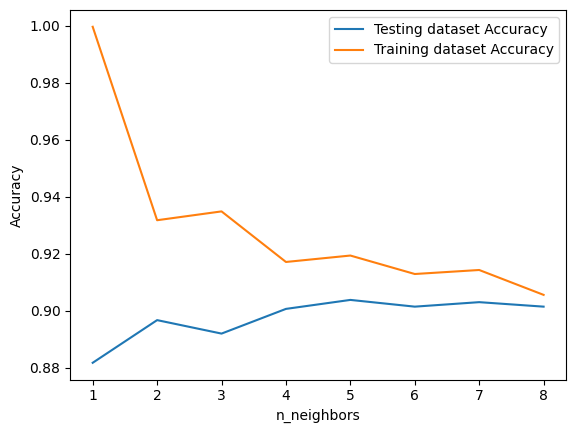

In [51]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
# Evaluate the combination system
score = knn.score(features_test, y_test)
y_pred = knn.predict(features_test)
print("Accuracy: %.2f%%" % (score*100))

Accuracy: 90.14%


In [55]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
cm = confusion_matrix(y_test, y_pred)

In [56]:
# Calculating accuracy, precision, recall and f1-score
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
precision = cm[1][1] / (cm[1][1] + cm[0][1])    # Also called Positive Predictive Value
recall = cm[1][1] / (cm[1][1] + cm[1][0])    # Also called Sensitivity, Hit Rate or True Positive Rate
f1_score = 2 * ((precision * recall) / (precision + recall))

In [59]:
# Printing the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)

Accuracy: 0.9014195583596214
Precision: 0.9749478079331941
Recall: 0.8051724137931034
F1-Score: 0.881964117091596


In [64]:
from sklearn.metrics import precision_recall_curve

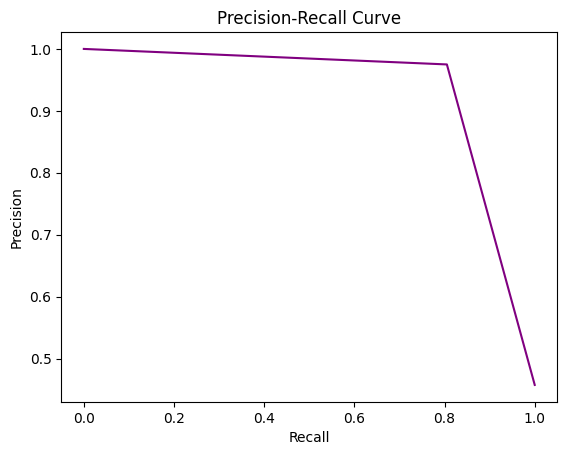

In [66]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [68]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       688
           1       0.97      0.81      0.88       580

    accuracy                           0.90      1268
   macro avg       0.92      0.89      0.90      1268
weighted avg       0.91      0.90      0.90      1268



(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

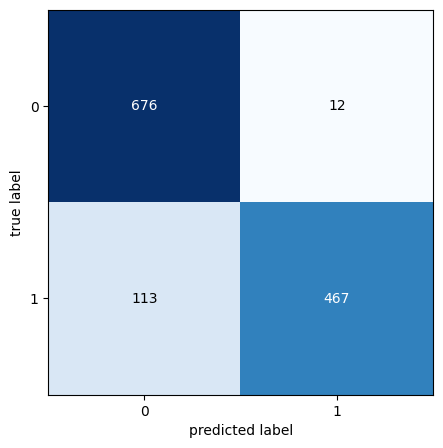

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
cm= confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(5,5))

In [75]:
#building th full CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 conv2d_29 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 conv2d_30 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 conv2d_31 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 75, 75, 32)        9248      
                                                      

In [83]:
# compile model
#from keras.optimizers import adam_v2
#opt = adam_v2(lr=0.001)

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.0001,  # minimium amount of change to count as an improvement
    patience=10,  # how many epochs to wait before stopping
)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
#history = model.fit(X_train_scaled, epochs=3,  validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])
#history = cnn_model.fit(X_train_scaled, y_train, epochs=10 )
history = model.fit(X_train_scaled,y_train , epochs=40,  validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

Epoch 1/40
111/111 [==============================] - 878s 8s/step - loss: 0.0891 - accuracy: 0.9718 - val_loss: 0.1011 - val_accuracy: 0.9579
Epoch 2/40
111/111 [==============================] - 876s 8s/step - loss: 0.0639 - accuracy: 0.9794 - val_loss: 0.1273 - val_accuracy: 0.9684
Epoch 3/40
111/111 [==============================] - 929s 8s/step - loss: 0.0634 - accuracy: 0.9777 - val_loss: 0.0993 - val_accuracy: 0.9612
Epoch 4/40
111/111 [==============================] - 860s 8s/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.1216 - val_accuracy: 0.9652
Epoch 5/40
111/111 [==============================] - 856s 8s/step - loss: 0.0909 - accuracy: 0.9715 - val_loss: 0.1518 - val_accuracy: 0.9579
Epoch 6/40
111/111 [==============================] - 862s 8s/step - loss: 0.0496 - accuracy: 0.9817 - val_loss: 0.1233 - val_accuracy: 0.9665
Epoch 7/40
111/111 [==============================] - 865s 8s/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.1690 - val_accuracy: 0.9704

In [85]:
prediction = model.predict (x_test)
prediction= (prediction > 0.5)
prediction


40/40 [==============================] - 62s 2s/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

40/40 - 88s - loss: 16.8437 - accuracy: 0.9669 - 88s/epoch - 2s/step


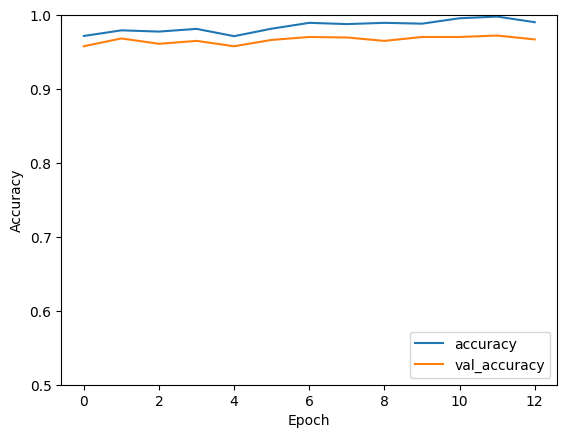

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

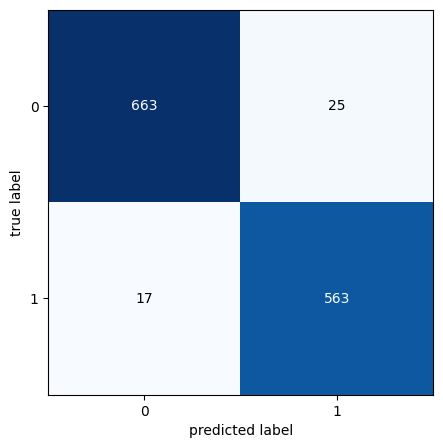

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
cm= confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, figsize=(5,5))

In [92]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.f%%" % (accuracy*100))
print(classification_report(y_test, prediction))

Accuracy: 97%
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       688
           1       0.96      0.97      0.96       580

    accuracy                           0.97      1268
   macro avg       0.97      0.97      0.97      1268
weighted avg       0.97      0.97      0.97      1268



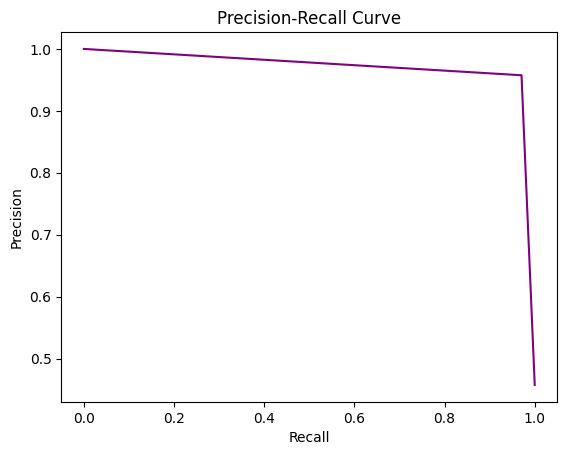

In [90]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, prediction)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()